In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
stocks = pd.read_csv("all_stock_and_etfs.csv")
stocks

,Date-Time,Open,High,Low,Close,Volume,Ticker_Symbol
0,2024-02-20,29.09,29.7100,29.0001,29.44,2673889,HRL
1,2024-02-16,29.01,29.1700,28.7650,28.99,5655091,HRL
2,2024-02-15,28.94,29.2210,28.8500,29.11,2380372,HRL
3,2024-02-14,28.76,28.8254,28.5100,28.80,2690379,HRL
4,2024-02-13,29.56,29.8000,28.6350,28.72,4173650,HRL
...,...,...,...,...,...,...,...
163552,1999-11-05,9.25,9.5000,9.2500,9.50,2300,ALG
163553,1999-11-04,9.31,9.4400,9.3100,9.31,1100,ALG
163554,1999-11-03,9.00,9.2500,9.0000,9.19,35000,ALG
163555,1999-11-02,8.75,8.8800,8.6200,8.88,7700,ALG


In [5]:
tickers = stocks["Ticker_Symbol"].unique()
print(tickers)

['HRL' 'VOO' 'ADM' 'AGCO' 'DIA' 'PEP' 'QSR' 'TSCO' 'ONEQ' 'PPC' 'CAG'
 'DRI' 'HSY' 'CAT' 'SBUX' 'CMG' 'COKE' 'CNHI' 'SPY' 'DE' 'TSN' 'GIS' 'WEN'
 'YUM' 'VMI' 'MCD' 'SAP' 'DPZ' 'ALG']


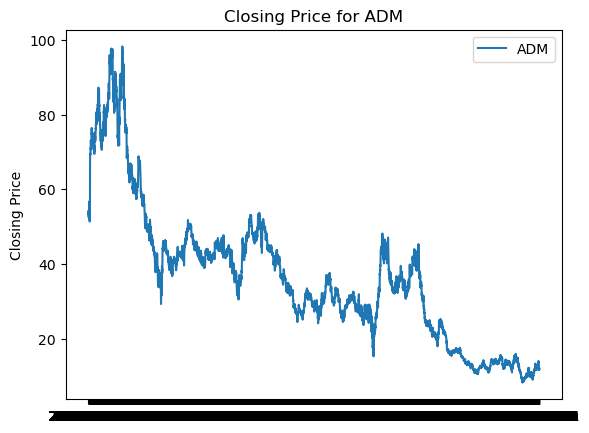

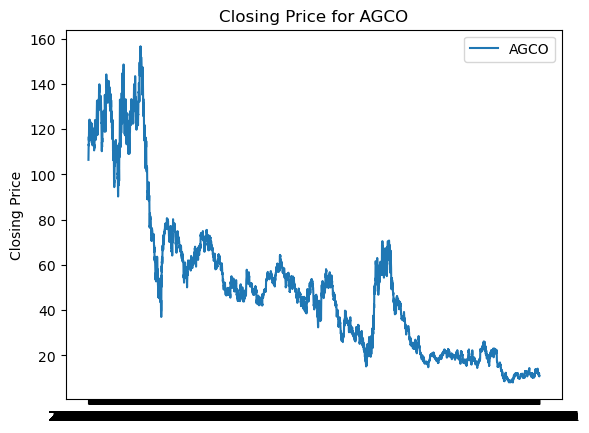

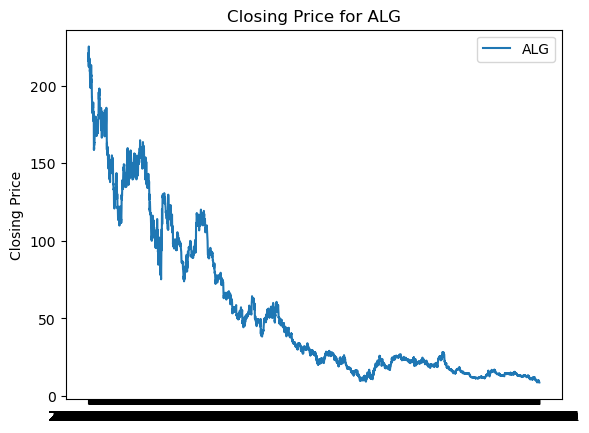

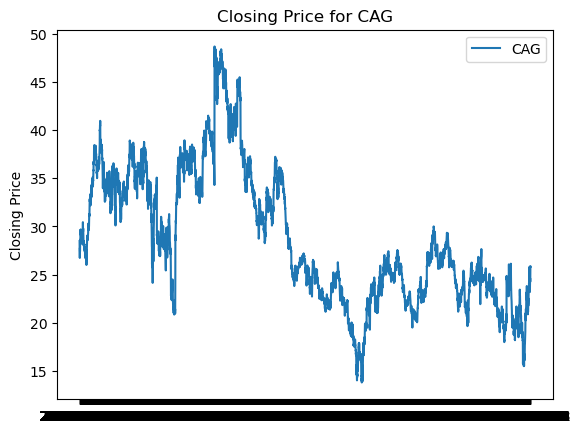

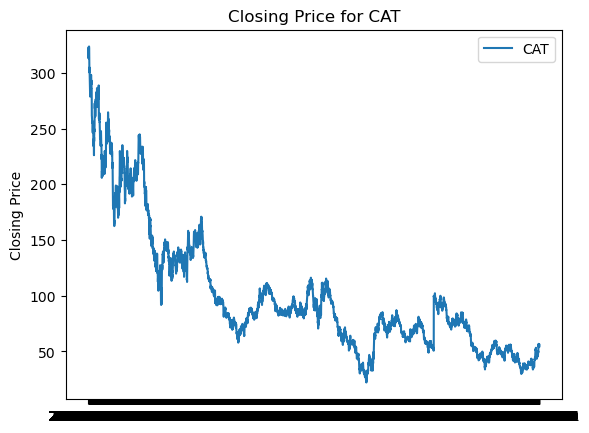

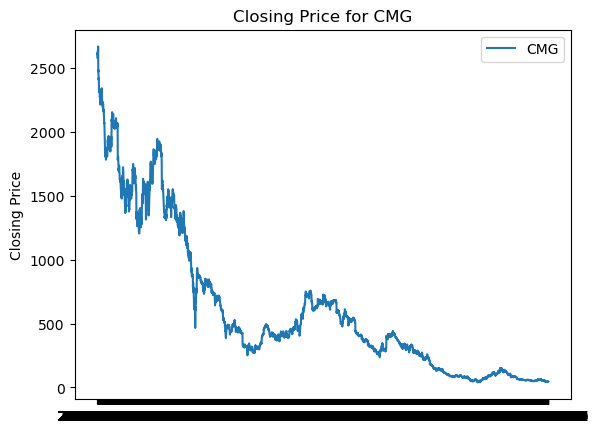

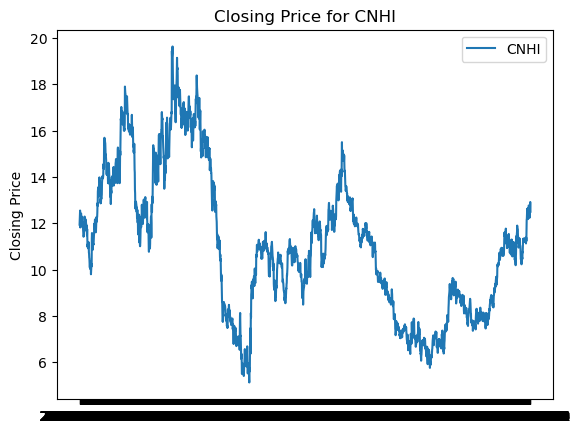

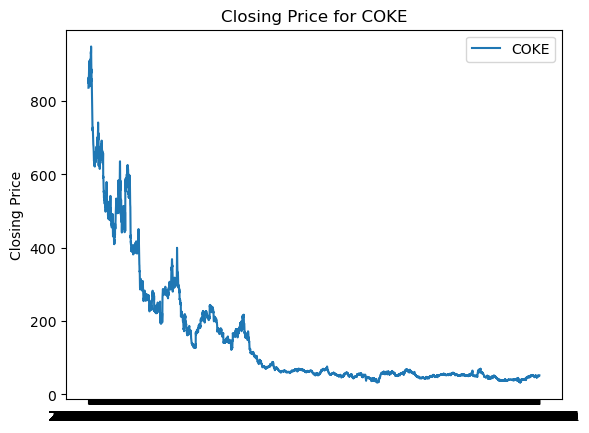

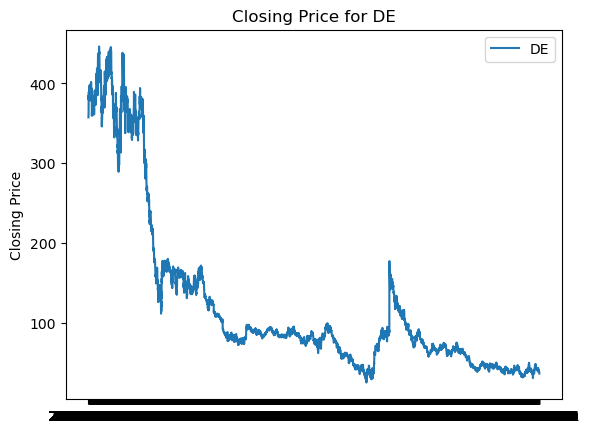

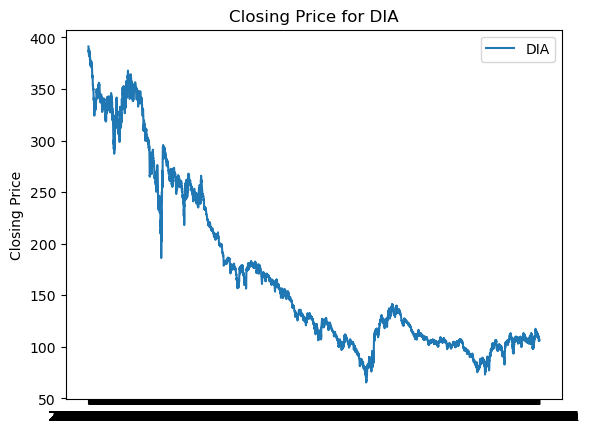

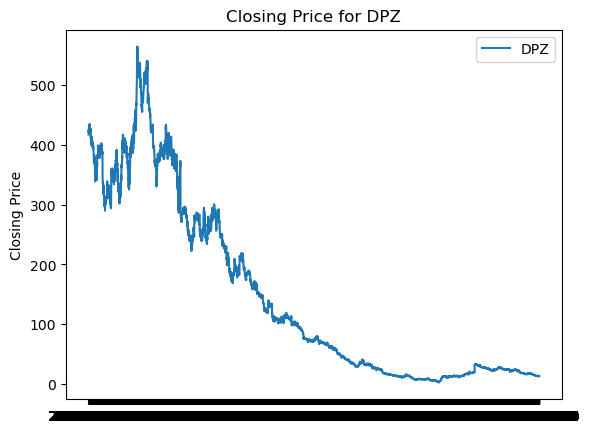

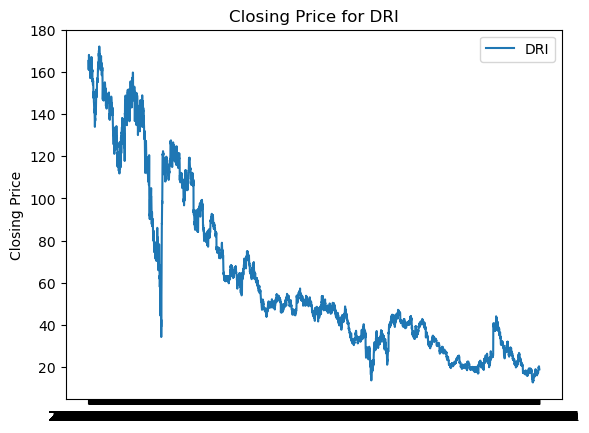

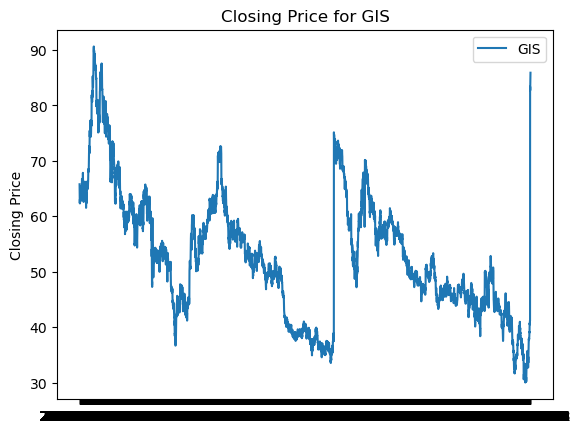

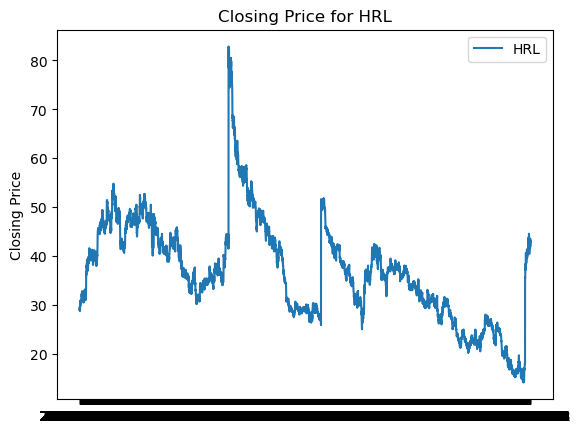

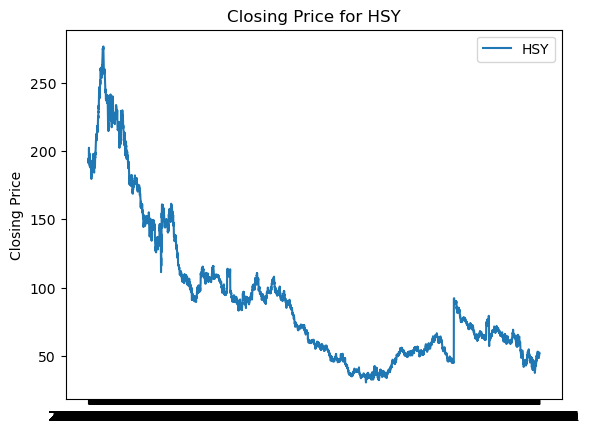

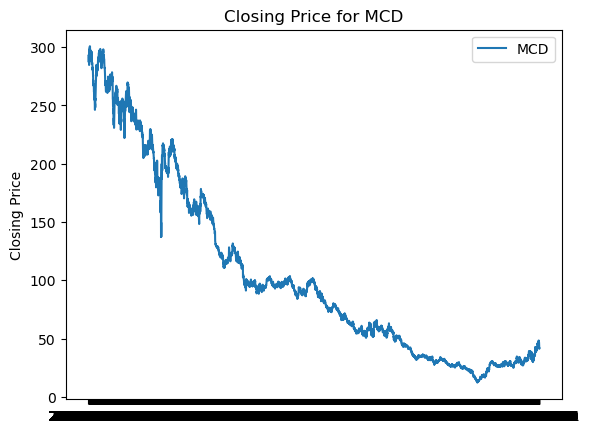

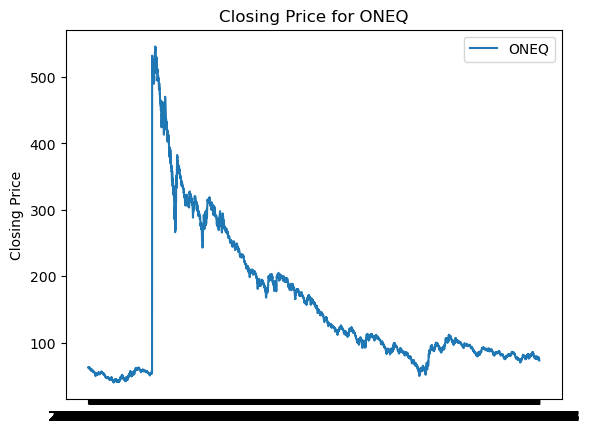

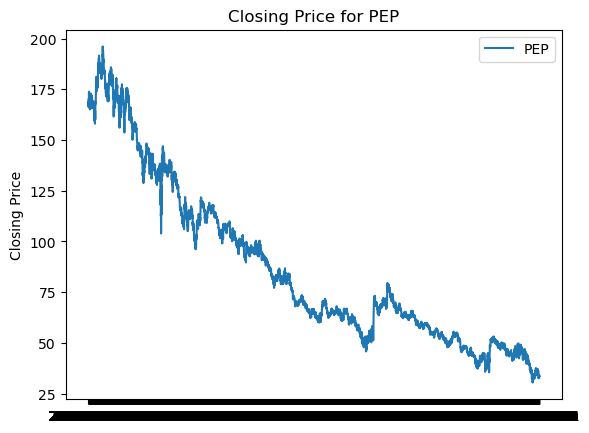

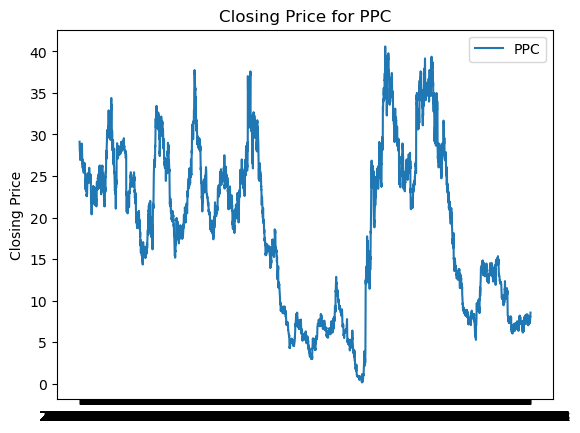

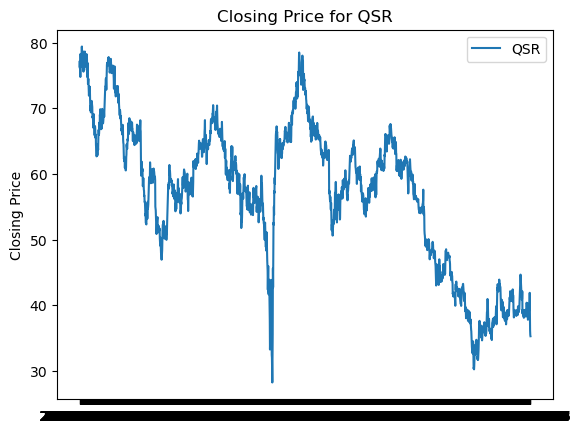

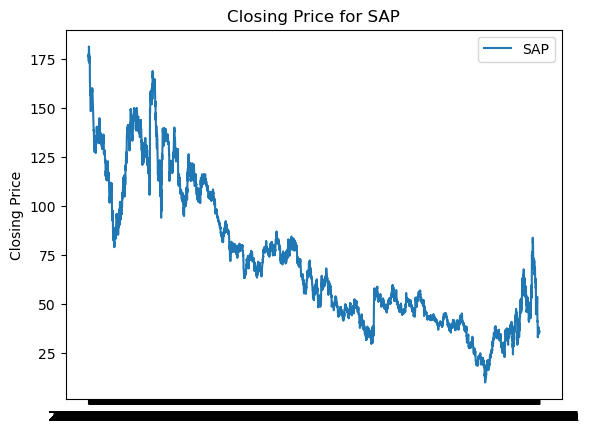

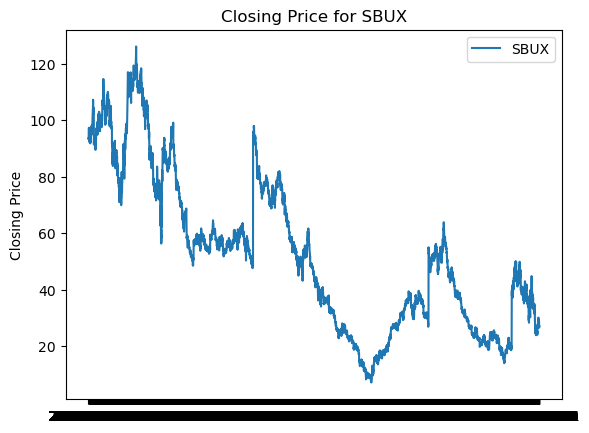

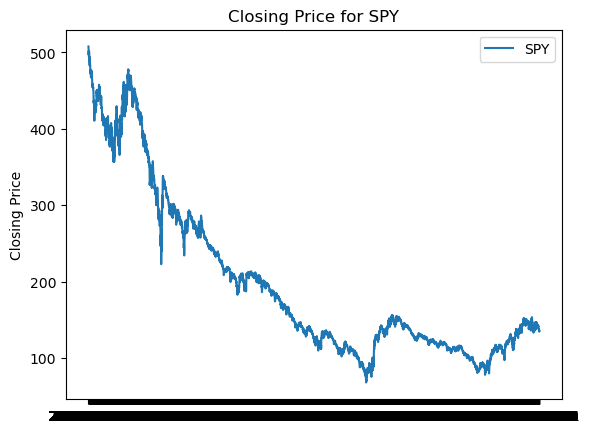

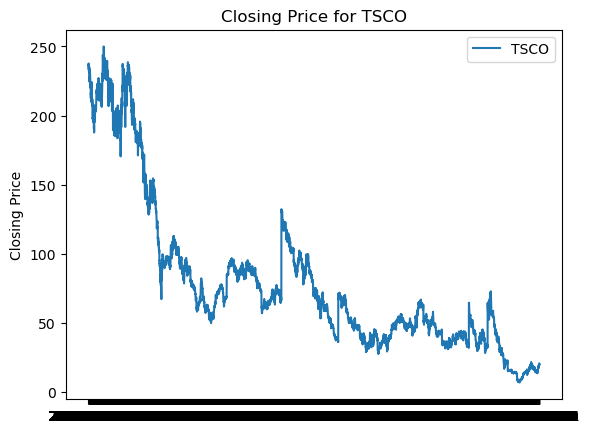

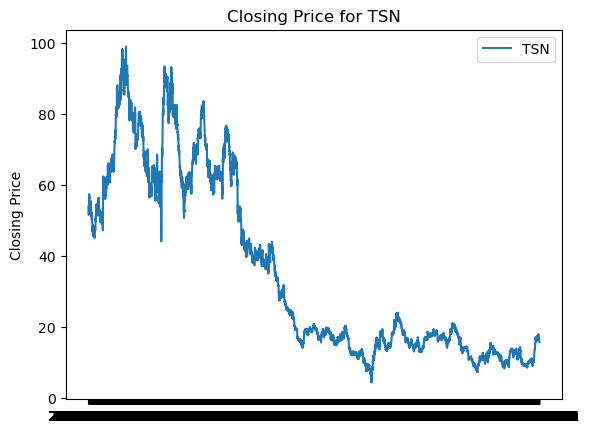

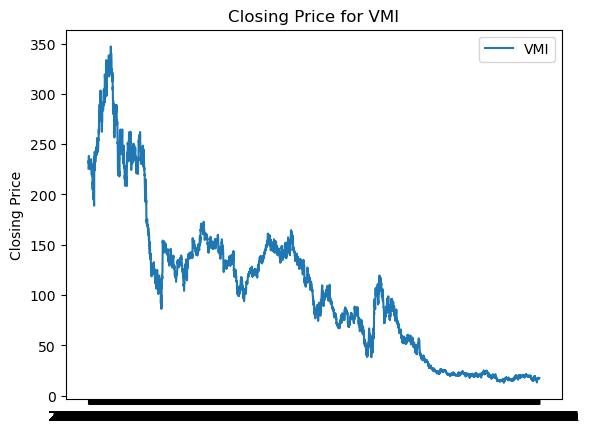

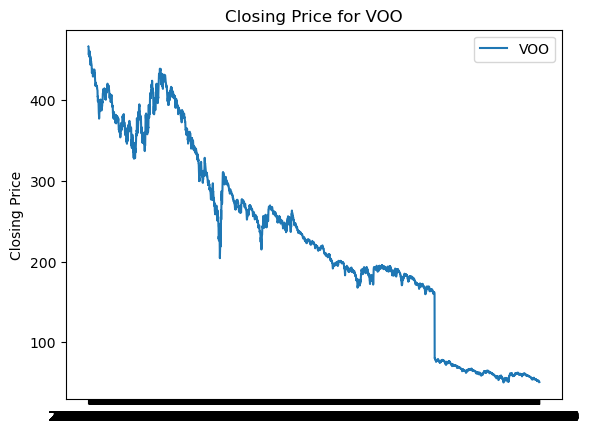

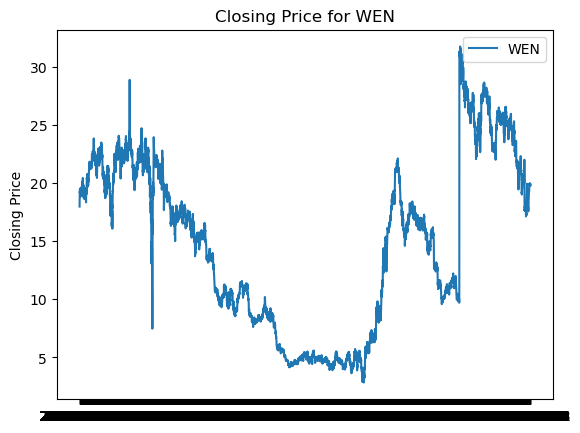

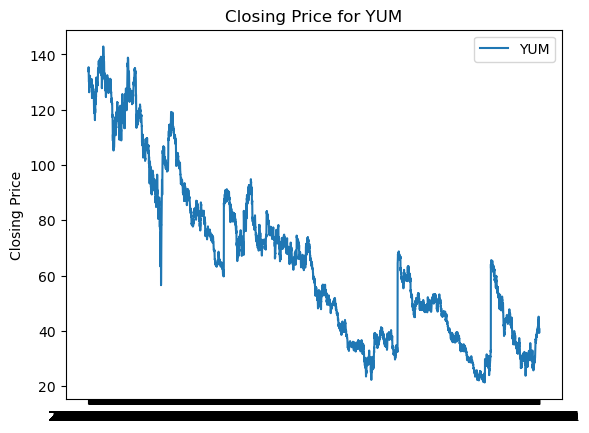

In [9]:
#plotting the closing prices

grouped_data = stocks.groupby('Ticker_Symbol')

for ticker, group in grouped_data:
    plt.plot(group['Date-Time'], group['Close'], label=ticker)
    plt.title(f"Closing Price for {ticker}")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.show()

In [10]:
from sklearn.linear_model import LinearRegression

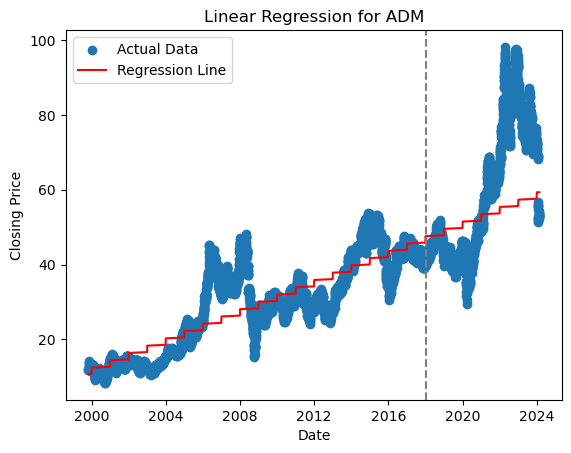

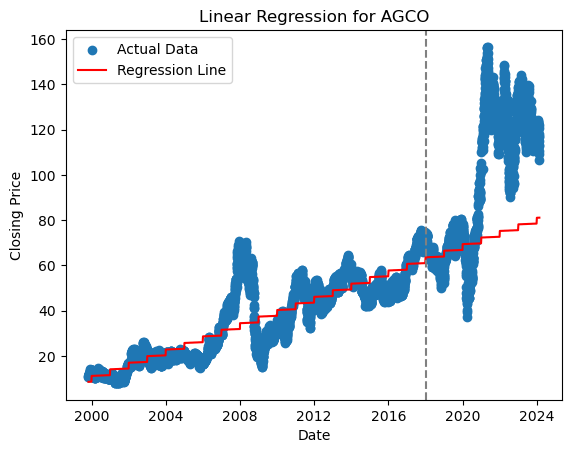

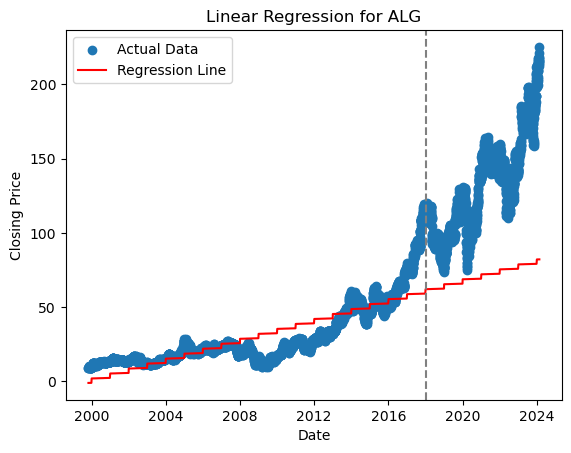

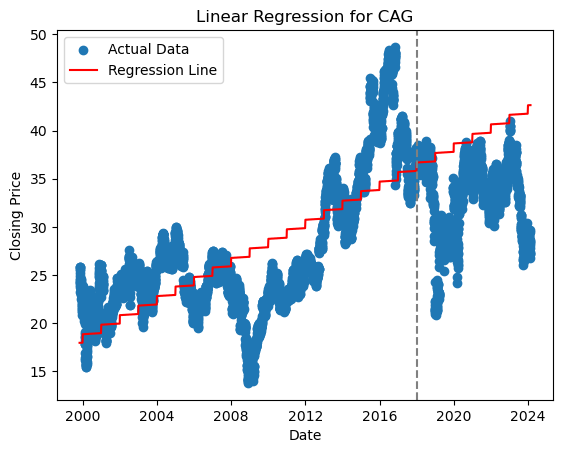

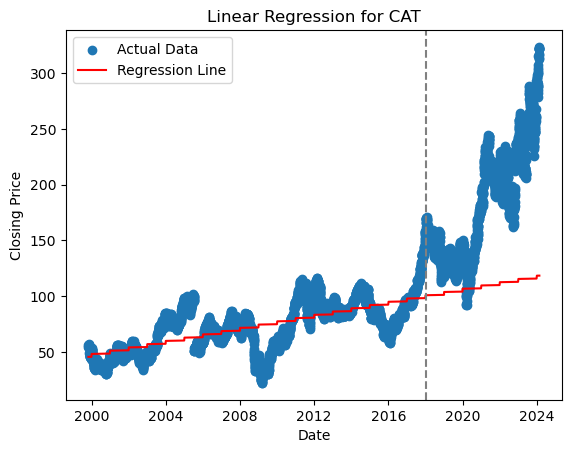

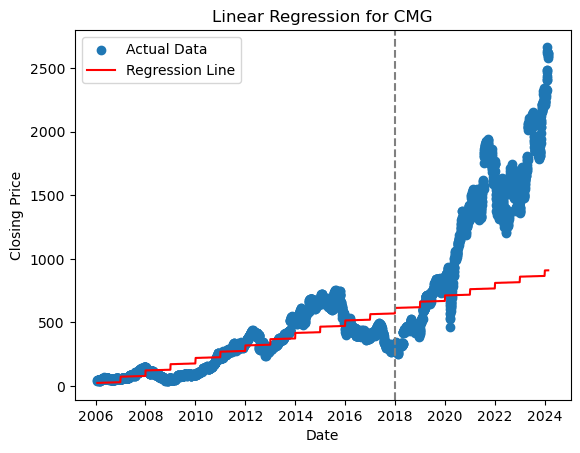

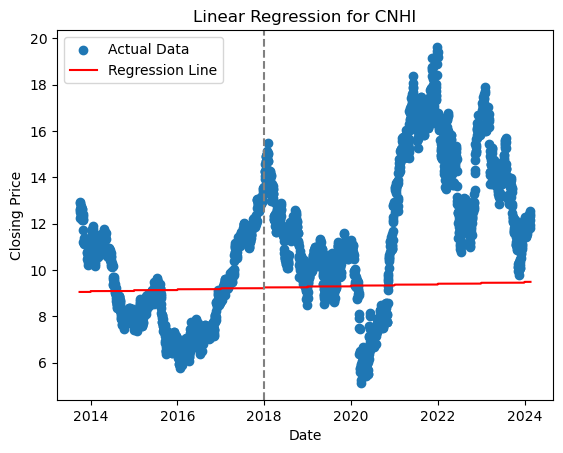

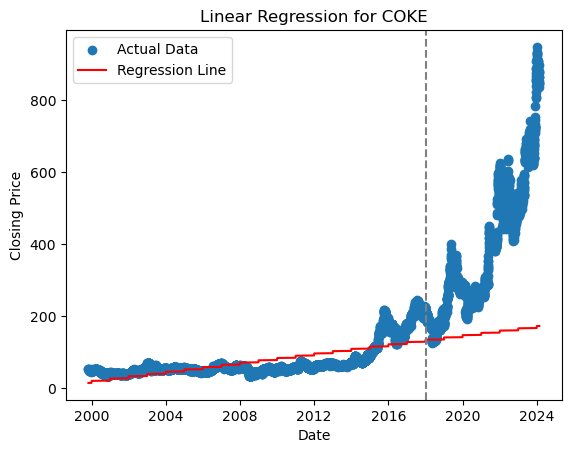

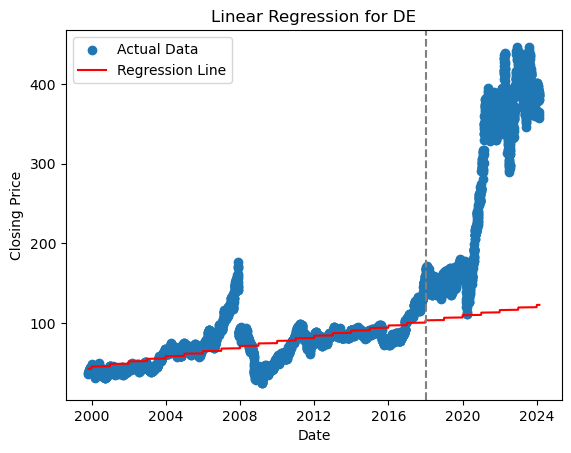

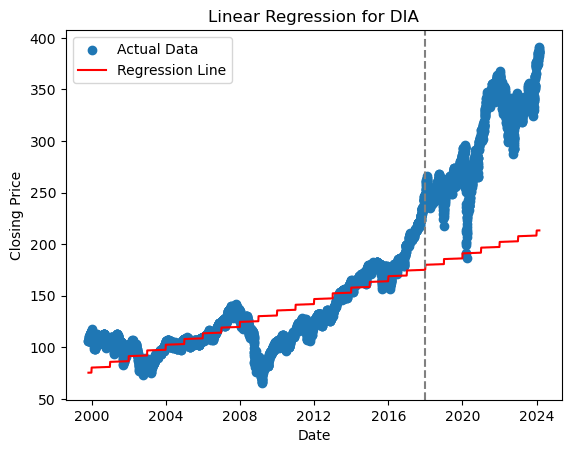

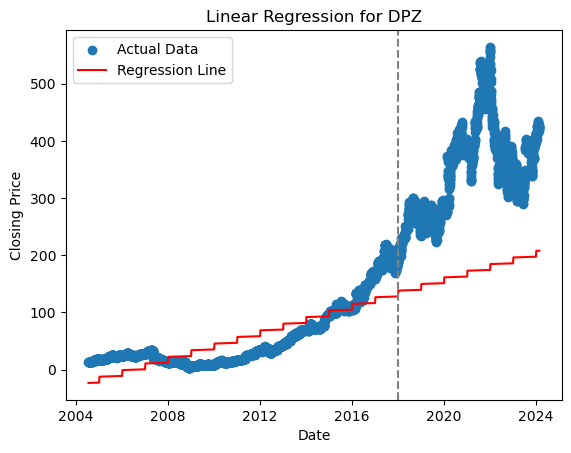

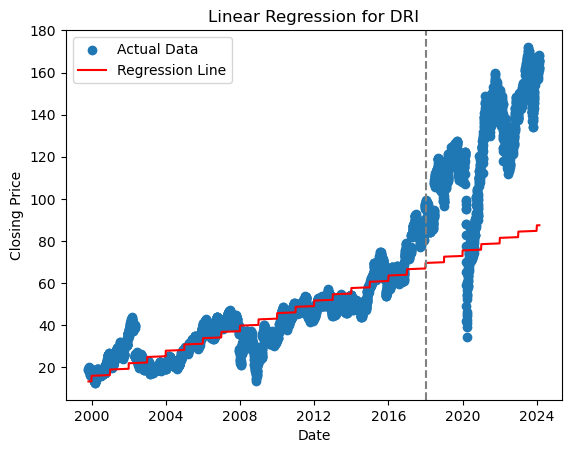

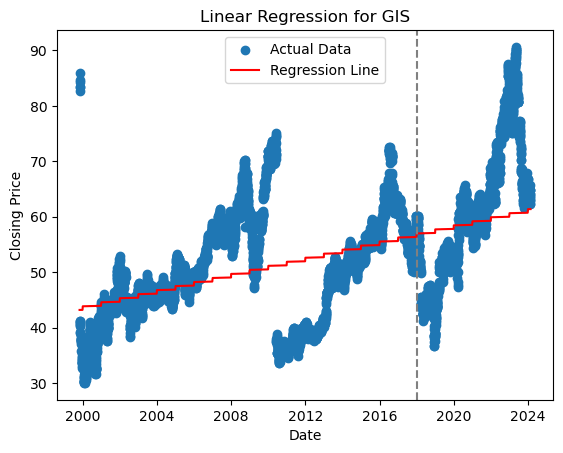

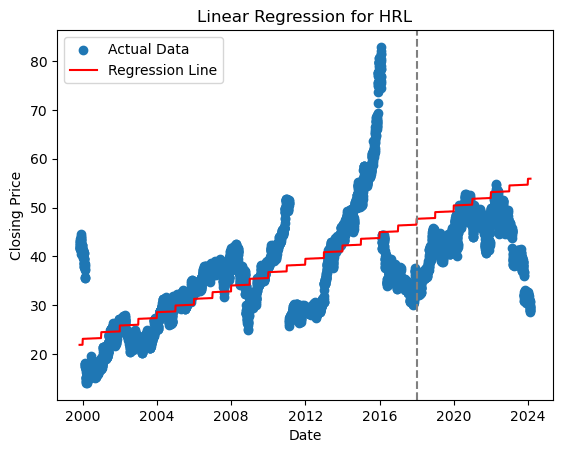

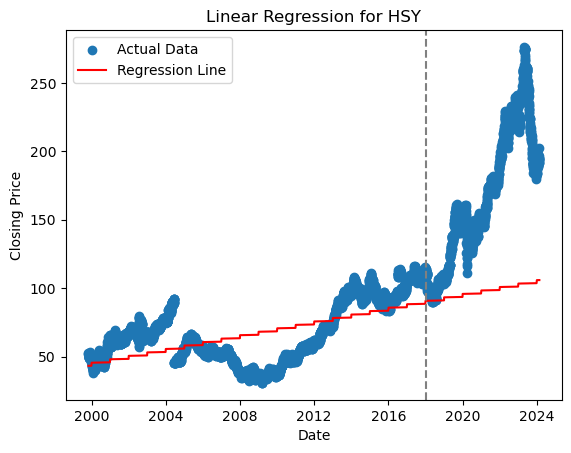

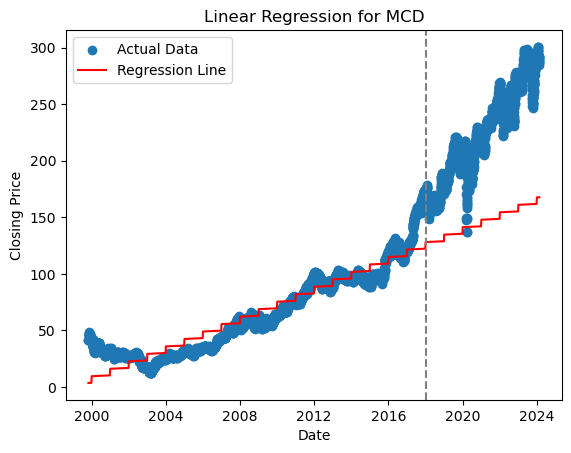

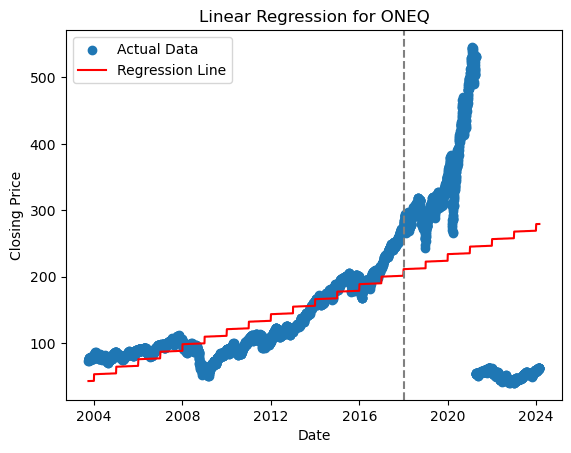

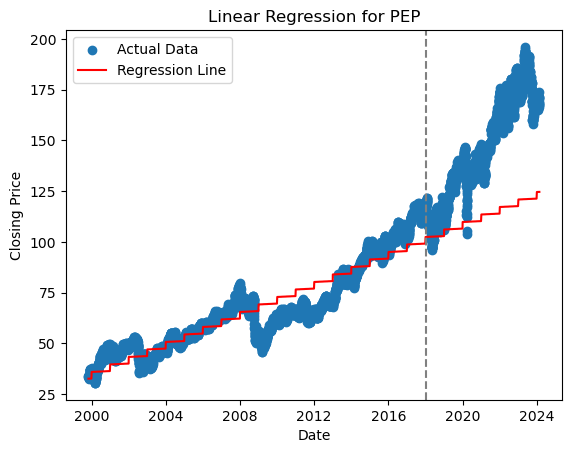

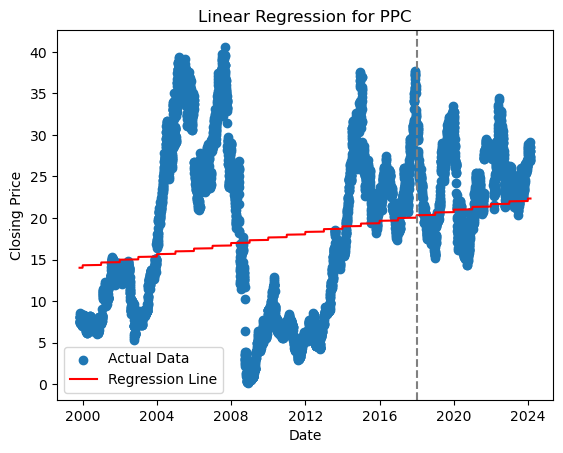

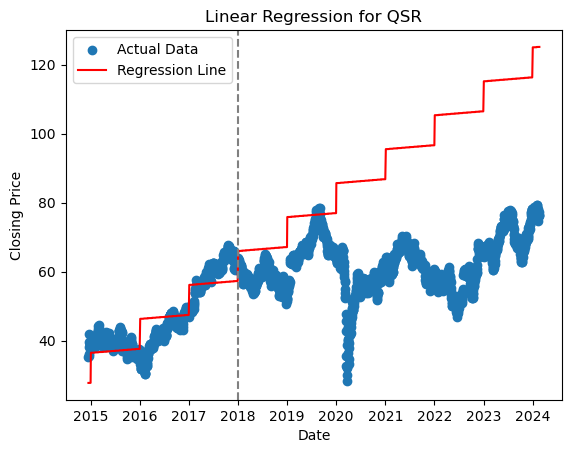

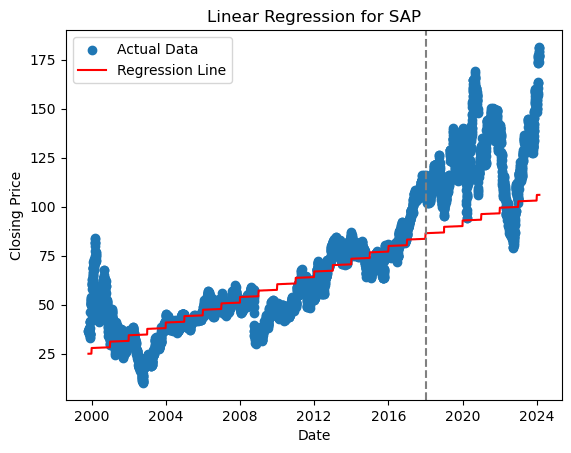

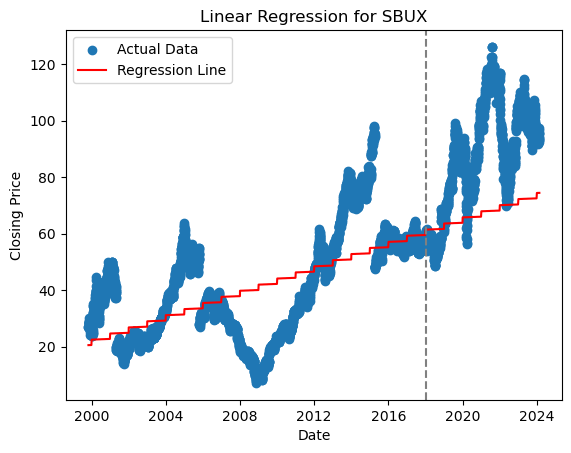

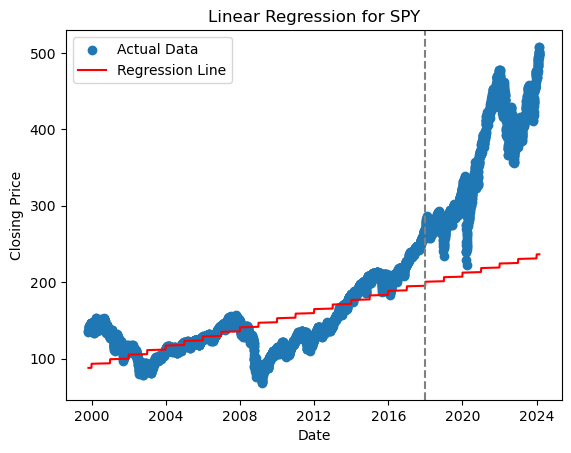

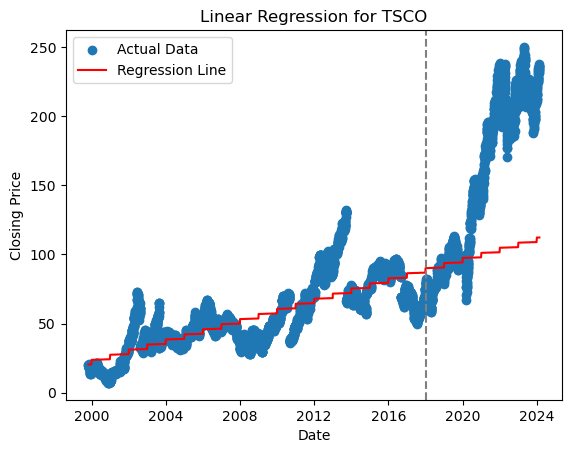

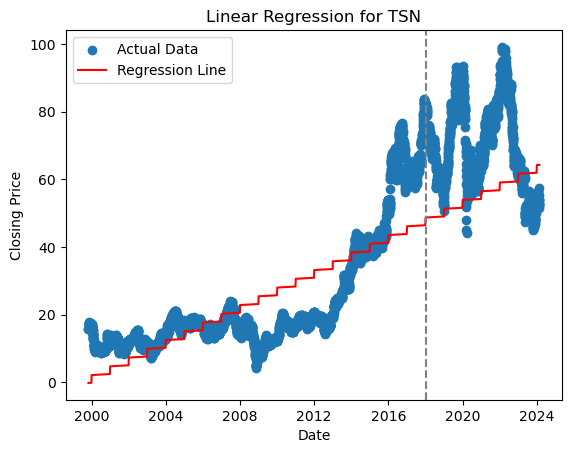

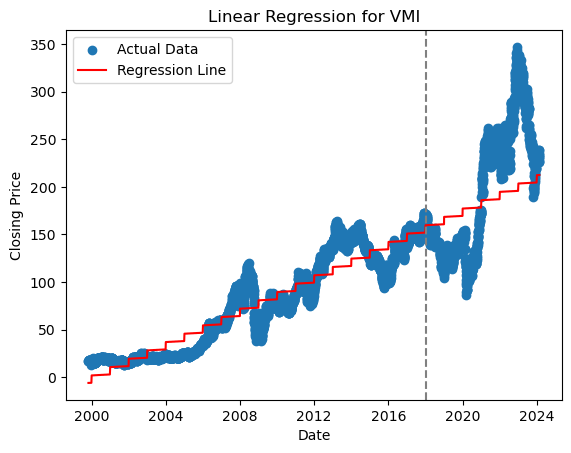

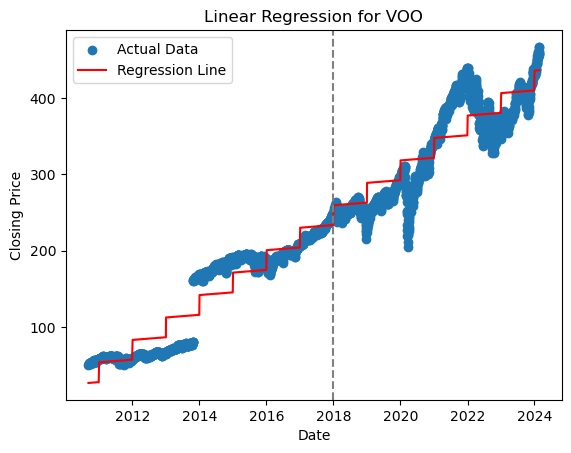

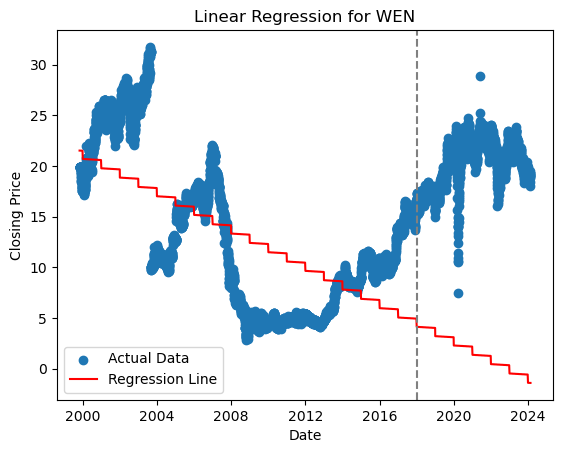

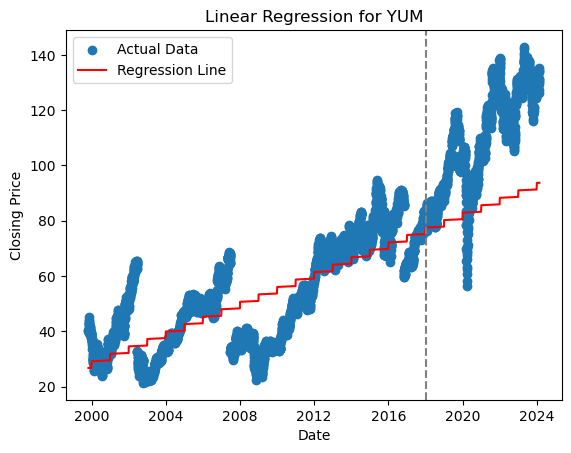

In [14]:
#linear regression using data from 2017 or earlier

for ticker, group in grouped_data:
    filtered_data = group[pd.to_datetime(group['Date-Time']).dt.year <= 2017]
    
    X = pd.to_datetime(filtered_data['Date-Time']).dt.strftime('%Y%m%d').astype(int).values.reshape(-1, 1)
    y = filtered_data['Close'].values.reshape(-1, 1)
    model = LinearRegression()
    model.fit(X, y)
    
    plt.scatter(pd.to_datetime(group['Date-Time']), group['Close'], label='Actual Data')
    plt.plot(pd.to_datetime(group['Date-Time']), model.predict(pd.to_datetime(group['Date-Time']).dt.strftime('%Y%m%d').astype(int).values.reshape(-1, 1)), color='red', label='Regression Line')
    plt.title(f"Linear Regression for {ticker}")
    plt.xlabel("Date")
    plt.ylabel("Closing Price")
    plt.legend()
    plt.axvline(pd.to_datetime('2018-01-01'), color='gray', linestyle='--')
    plt.show()

Doing the regressions again this time I want to see the mean squared error (MSE) with the straight line of the data before and after 2017. 
The plan is to later run a hypothesis test on whether there has been any significant decrease or not overall.

In [20]:
from sklearn.metrics import mean_squared_error

In [21]:
mse_pre_2017 = []
mse_post_2017 = []

for ticker, group in grouped_data:
    # Filter data for 2017 or earlier
    filtered_data_pre_2017 = group[pd.to_datetime(group['Date-Time']).dt.year <= 2017]
    # Filter data for 2018 and later
    filtered_data_post_2017 = group[pd.to_datetime(group['Date-Time']).dt.year >= 2018]
    
    # Extract features (date) and target (closing price) for pre-2017 data
    X_pre_2017 = pd.to_datetime(filtered_data_pre_2017['Date-Time']).dt.strftime('%Y%m%d').astype(int).values.reshape(-1, 1)
    y_pre_2017 = filtered_data_pre_2017['Close'].values.reshape(-1, 1)
    
    # Perform linear regression for pre-2017 data
    model_pre_2017 = LinearRegression()
    model_pre_2017.fit(X_pre_2017, y_pre_2017)
    
    # Predict closing prices using linear regression model for pre-2017 data
    y_pred_pre_2017 = model_pre_2017.predict(X_pre_2017)
    
    # Calculate MSE for pre-2017 data
    mse_pre = mean_squared_error(y_pre_2017, y_pred_pre_2017)
    mse_pre_2017.append(mse_pre)
    
    # Extract features (date) for post-2017 data
    X_post_2017 = pd.to_datetime(filtered_data_post_2017['Date-Time']).dt.strftime('%Y%m%d').astype(int).values.reshape(-1, 1)
    
    # Predict closing prices using the same regression model for post-2017 data
    y_pred_post_2017 = model_pre_2017.predict(X_post_2017)
    
    # Extract actual closing prices for post-2017 data
    y_post_2017 = filtered_data_post_2017['Close'].values.reshape(-1, 1)
    
    # Calculate MSE for post-2017 data using the same regression model
    mse_post = mean_squared_error(y_post_2017, y_pred_post_2017)
    mse_post_2017.append(mse_post)


MSE before 2017: [38.48894739431623, 77.98927617277835, 148.4014420197891, 24.5927724063353, 274.0460441759246, 13336.47563111767, 3.72783702542313, 1046.9945384157566, 376.06432789503964, 445.21065771167116, 935.9837612239182, 61.12877718448368, 74.77321012785751, 68.40452059330363, 317.57688366130634, 169.2225209543056, 643.0425049586905, 69.40635992116495, 103.07210386056089, 29.009507199993763, 139.1498806735764, 226.36910549900995, 838.9393781797436, 234.54258595911097, 120.6575223804577, 288.10400765196346, 580.6367369899743, 32.74261238374173, 131.89294748779938]
MSE after 2017: [266.1775330952945, 1358.3878447608213, 4367.968415385037, 55.51797933954819, 7651.338215004026, 470299.9041368603, 18.338838915112426, 83248.77234947415, 36590.93718502383, 12545.233488717757, 36855.64454410639, 2595.890963599446, 120.82050600324956, 97.66768067153403, 6636.43943324254, 7041.453503901664, 30622.072606720445, 1516.5325183713996, 26.342329235999372, 1162.9771169780884, 1206.9014049130092,

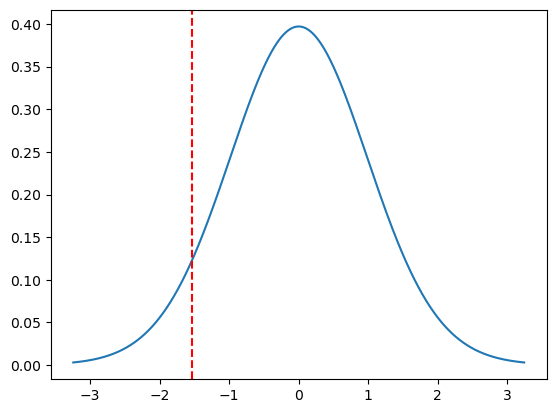

0.06580622782125223


In [40]:
# 2-sample t-test
from scipy.stats import t
import math

n = 2*len(mse_pre_2017) - 2
x = np.linspace(t.ppf(0.001, n), t.ppf(0.999, n), 1000)
pdf = t.pdf(x, n)

xmean = np.mean(mse_pre_2017)
ymean = np.mean(mse_post_2017)
xsample_var = np.var(mse_pre_2017, ddof=1)
ysample_var = np.var(mse_post_2017, ddof=1)
t_obvs = (xmean - ymean)/math.sqrt((xsample_var + ysample_var)/len(mse_pre_2017))


plt.plot(x, pdf, label=f't-distribution (df={n})')
plt.axvline(x=t_obvs, color='r', linestyle='--')
plt.show()

probability = probability = t.sf(t_obvs, n)
print(1-probability)

Weak evidence to reject H0 
i.e. there hasnt been a big overall change in trends since 2017